In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [27]:
file_path = "processing_data_2.xlsx"
df = pd.read_excel(file_path)

In [28]:
features = ["price_log1p", "rating_average", "quantity_sold_value", "discount_percent_clean", "width", "height"]
X = df[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

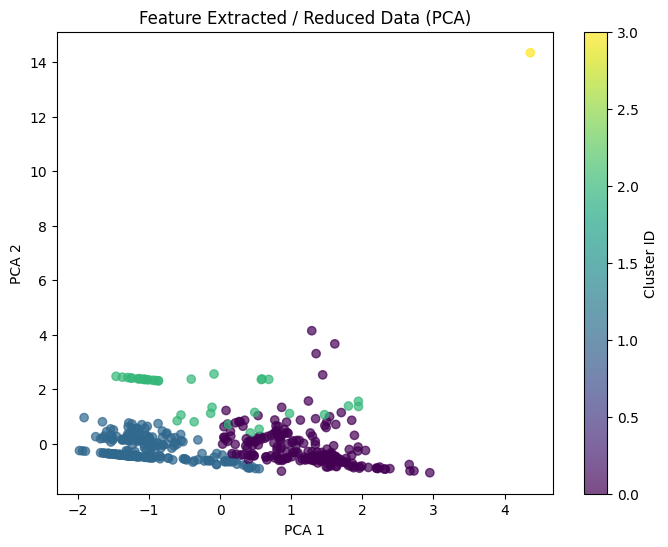

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df["pca1"], df["pca2"], c=df["cluster_id"], alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Feature Extracted / Reduced Data (PCA)")
plt.colorbar(label="Cluster ID")
plt.show()

In [30]:
print("[INFO] Variance explained by PCA:", pca.explained_variance_ratio_)
print("[INFO] Tổng phương sai giữ lại:", pca.explained_variance_ratio_.sum())

[INFO] Variance explained by PCA: [0.37964979 0.25716843]
[INFO] Tổng phương sai giữ lại: 0.6368182256098232


In [31]:
df.to_excel("processing_data_3.xlsx", index=False)
print("[INFO] Đã lưu processing_data_3.xlsx với các cột pca1, pca2")

[INFO] Đã lưu processing_data_3.xlsx với các cột pca1, pca2
